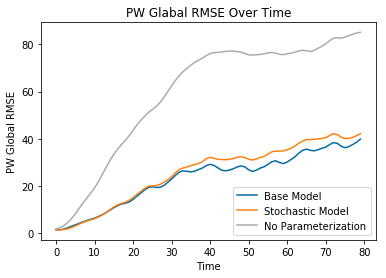

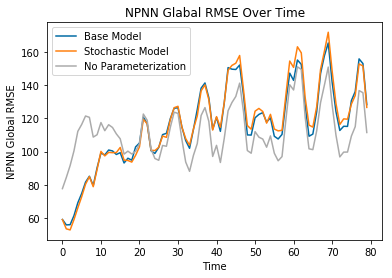

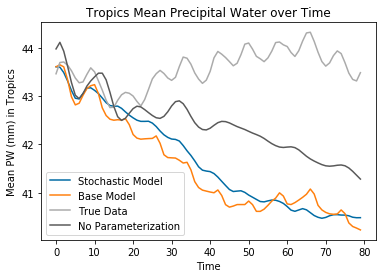

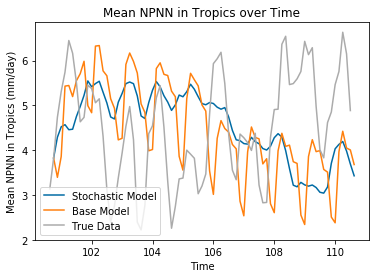

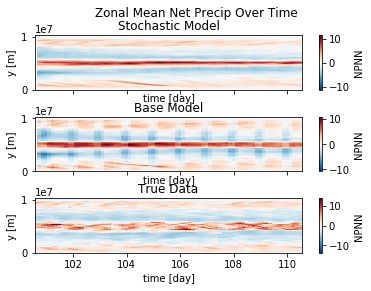

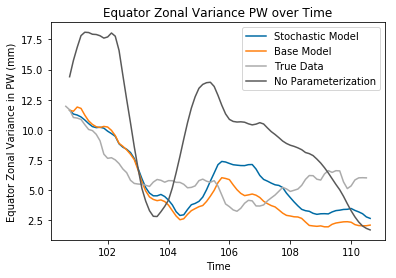

In [1]:
from uwnet.stochastic_parameterization.compare_stochastic_model_to_base_model import (
    plot_rmse_over_time,
    plot_total_pw_over_time,
    plot_npnn_over_time,
    plot_zonal_mean_npnn_over_time,
    plot_pw_tropics_zonal_variance_over_time,
)
from uwnet.stochastic_parameterization.utils import get_dataset
from uwnet.thermo import lhf_to_evap
import xarray as xr

%matplotlib inline
dir_ = '/Users/stewart/Desktop/'
ds_no_param = xr.open_dataset(dir_ + 'no_parameterization.nc')
ds_s = xr.open_dataset(dir_ + 'stochastic_model_gcm_output_short_dt.nc')
ds_b = xr.open_dataset(dir_ + 'base_model_gcm_output.nc')
ds_true = get_dataset(
    ds_location="/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/training.nc",  # noqa
    set_eta=False,
    t_start=0,
    t_stop=len(ds_s.time))
ds_true['NPNN'] = ds_true.Prec - lhf_to_evap(ds_true.LHF)
plot_rmse_over_time(ds_s, ds_b, ds_true, ds_no_param, 'PW')
plot_rmse_over_time(ds_s, ds_b, ds_true, ds_no_param, 'NPNN')
plot_total_pw_over_time(ds_s, ds_b, ds_true, ds_no_param)
plot_npnn_over_time(ds_s, ds_b, ds_true)
plot_zonal_mean_npnn_over_time(ds_s, ds_b, ds_true)
plot_pw_tropics_zonal_variance_over_time(ds_s, ds_b, ds_true, ds_no_param)